permalink               True
name                    True
homepage_url            True
category_list           True
 market                 True
 funding_total_usd      True
status                  True
country_code            True
state_code              True
region                  True
city                    True
funding_rounds          True
founded_at              True
founded_month           True
founded_quarter         True
founded_year            True
first_funding_at        True
last_funding_at         True
seed                    True
venture                 True
equity_crowdfunding     True
undisclosed             True
convertible_note        True
debt_financing          True
angel                   True
grant                   True
private_equity          True
post_ipo_equity         True
post_ipo_debt           True
secondary_market        True
product_crowdfunding    True
round_A                 True
round_B                 True
round_C                 True
round_D       

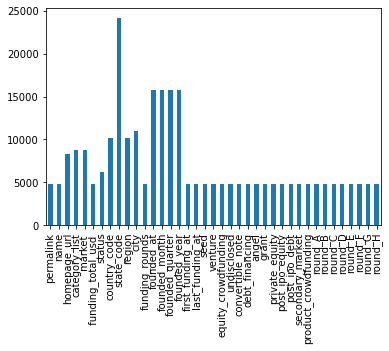

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/Users/davidguix/Desktop/investments_VC.csv', encoding='latin_1', sep=',')

print(df.isna().any())

# Bar plot of missing values by variable
df.isna().sum().plot(kind="bar")
plt.show()


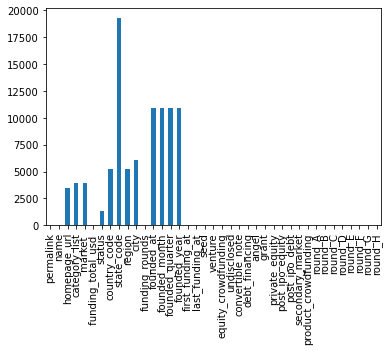

In [91]:
#Eliminamos las ultimas filas que solo contienen Nan

df_clean = df.dropna(how='all')

df_clean.isna().sum().plot(kind="bar")
plt.show()

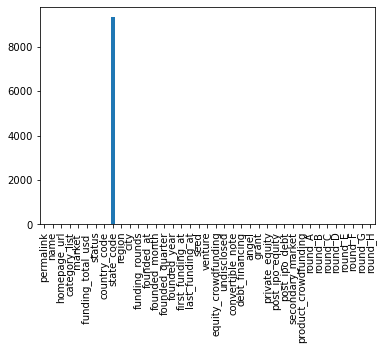

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,"1,54,19,877",closed,MYS,NaN,MYS - Other,...,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#Eliminamos las filas que contienen Nan, excepto los Nan de la columna State_code
#Las columna de State_code es exclusiva para las startups de USA

seleccion = df_clean.columns[2:8]
df_clean = df_clean.dropna(subset=seleccion, how='any')

seleccion2 = df_clean.columns[10:]
df_clean = df_clean.dropna(subset=seleccion2, how='any')

df_clean.isna().sum().plot(kind="bar")
plt.show()
df_clean

In [93]:
from IPython.display import display

#display(df.head())
#print(df.info())
#print(df.shape)

#print(df.describe())
#print(df.values)
#print(df.columns)
#print(df.index)
print(df_clean.columns)

#CREAR UNA NUEVA COLUMNA 'funding_total' CON LA SUMA DE TODOS LOS FUNDINGS QUE RECIBE CADA STARTUP
#SE CREA ESTA COLUMNA PORQUE LA COLUMNA EXISTENTE ' funding_total_usd ' PRESENTA ERRORES EN LOS DATOS
df_clean['funding_total'] = df_clean[df_clean.columns[18:31]].sum(axis=1) 

#REDUCIR A SOLO STARTUPS FUNDADAS DE 2000 EN ADELANTE
millennials = df_clean['founded_year'] > 1999
print('\n DATAFRAME df_clean \n')
display(df_clean[millennials])

'''
#ELIMINAMOS LAS SIGUIENTES COLUMNAS
df_sin_cols = df.drop(['permalink', 'state_code', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1)
 
display(df_sin_cols)
'''
print(round(df_clean['funding_total'].mean(),2))
print(round(df_clean['funding_total'].median(),2))

#REDUCIMOS EL ESPECTRO A LAS STARTUPS QUE HAN RECIBIDO FINANCIACION EXTERNA
funded = (df_clean['seed'] > 0) | (df_clean['venture'] > 0)
df_funded = df_clean[funded]
print('\n DATAFRAME df_funded \n')
display(df_funded[['seed', 'venture', 'funding_total']])

print('La media de inversion en fase seed es: ', round(df_funded['seed'].mean(),2))
print('La MEDIANA de inversion en fase seed es: ', round(df_funded['seed'].median(),2))
print('La MODA de inversion en fase seed es: ', round(df_funded['seed'].mode(),2))
print('El MINIMO de inversion en fase seed es: ', round(df_funded['seed'].min(),2))
print('EL MAXIMO de inversion en fase seed es: ', round(df_funded['seed'].max(),2))
print('La VARIACION de inversion en fase seed es: ', round(df_funded['seed'].var(),2))
print('El QUANTILE de inversion en fase seed es: ', round(df_funded['seed'].quantile(0.9),2))
print('La STD DEV de inversion en fase seed es: ', round(df_funded['seed'].std(),2), '\n')

print('La media de inversion en fase venture es: ', round(df_funded['venture'].mean(),2))
print('La MEDIANA de inversion en fase venture es: ', round(df_funded['venture'].median(),2))
print('La MODA de inversion en fase sventure es: ', round(df_funded['venture'].mode(),2))
print('El MINIMO de inversion en fase venture es: ', round(df_funded['venture'].min(),2))
print('EL MAXIMO de inversion en fase venture es: ', round(df_funded['venture'].max(),2))
print('La VARIACION de inversion en fase venture es: ', round(df_funded['venture'].var(),2))
print('La STD DEV de inversion en fase venture es: ', round(df_funded['venture'].std(),2), '\n')

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

 DATAFRAME df_clean 



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
49428,/organization/zynstra,Zynstra,http://www.zynstra.com,|Software|,Software,"1,47,50,000",operating,GBR,NaN,Bath,...,0.0,3800000.0,8400000.0,0.0,0.0,0.0,0.0,0.0,0.0,14750000.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0


15561638.41
1430000.0

 DATAFRAME df_funded 



,seed,venture,funding_total
0,1750000.0,0.0,1750000.0
2,40000.0,0.0,40000.0
3,1500000.0,0.0,1500000.0
10,40000.0,0.0,40000.0
15,400000.0,4000000.0,4400000.0
...,...,...,...
49430,0.0,7991547.0,15419877.0
49432,0.0,2686600.0,2686600.0
49433,320000.0,0.0,320000.0
49435,71525.0,0.0,97398.0


La media de inversion en fase seed es:  364395.7
La MEDIANA de inversion en fase seed es:  0.0
La MODA de inversion en fase seed es:  0    0.0
dtype: float64
El MINIMO de inversion en fase seed es:  0.0
EL MAXIMO de inversion en fase seed es:  100000000.0
La VARIACION de inversion en fase seed es:  1374365116785.1
El QUANTILE de inversion en fase seed es:  1210199.2
La STD DEV de inversion en fase seed es:  1172333.19 

La media de inversion en fase venture es:  12559442.13
La MEDIANA de inversion en fase venture es:  2000000.0
La MODA de inversion en fase sventure es:  0    0.0
dtype: float64
El MINIMO de inversion en fase venture es:  0.0
EL MAXIMO de inversion en fase venture es:  2351000000.0
La VARIACION de inversion en fase venture es:  1504373281646421.2
La STD DEV de inversion en fase venture es:  38786251.19 



In [94]:
#DETECTAR Y ELIMINAR OUTLIERS
q_funding = df_funded['funding_total'].quantile(0.99)
print('El percentil 99 en el funding_total: ', q_funding,'\n')

df_outliers = df_funded[df_funded['funding_total'] > q_funding]
print('\nEstos son las startups outliers en funding\n')
display(df_outliers)

print('La media de inversion en outliers es: ', round(df_outliers['funding_total'].mean(),2))
print('La MEDIANA de inversion en outliers es: ', round(df_outliers['funding_total'].median(),2))
print('La MODA de inversion en outliers es: ', round(df_outliers['funding_total'].mode(),2))
print('El MINIMO de inversion en outliers es: ', round(df_outliers['funding_total'].min(),2))
print('EL MAXIMO de inversion en outliers es: ', round(df_outliers['funding_total'].max(),2))
print('La VARIACION de inversion en outliers es: ', round(df_outliers['funding_total'].var(),2))
print('La STD DEV de inversion en outliers es: ', round(df_outliers['funding_total'].std(),2), '\n')

#comprobar cual es la startup con max funding
print('\nEsta es la startup con max funding\n')
print(df_outliers[['name', 'funding_total']].agg([np.max]))

#ELIMINAMOS LOS 232 OUTLIERS DEL df_funded
df_funded_no_outliers = df_funded[df_funded['funding_total'] < q_funding]
print('\nEste es el df sin los 232 outliers\n')
display(df_funded_no_outliers)

#ELIMINAMOS LOS OUTLIERS QUE TIENEN MUCHAS RONDAS DE FINANCIACION
q_funding_rounds = df_funded_no_outliers['funding_rounds'].quantile(0.90)

df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['funding_rounds'] < q_funding_rounds]

display(df_funded_no_outliers)

El percentil 99 en el funding_total:  179468999.99999896 


Estos son las startups outliers en funding



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
332,/organization/55tuan-com,55tuan.com,http://www.55tuan.com,|E-Commerce|,E-Commerce,"20,00,00,000",operating,CHN,NaN,Beijing,...,0.0,200000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+08
334,/organization/58-com,58.com,http://www.58.com,|Software|Internet|Curated Web|,Software,"87,67,80,000",operating,CHN,NaN,CHN - Other,...,0.0,5000000.0,5780000.0,60000000.0,55000000.0,0.0,0.0,0.0,0.0,8.767800e+08
495,/organization/a123systems,A123 Systems,http://a123systems.com,|Batteries|Clean Technology|Mobile|,Batteries,"50,28,60,000",operating,USA,MA,Worcester,...,0.0,32000000.0,30000000.0,40000000.0,30000000.0,69000000.0,0.0,0.0,0.0,5.028600e+08
553,/organization/ability-network,ABILITY Network,http://www.abilitynetwork.com,|Health Care|,Health Care,"58,30,00,000",operating,USA,MN,Minneapolis,...,0.0,0.0,0.0,27000000.0,0.0,0.0,0.0,0.0,0.0,5.830000e+08
612,/organization/acacia-research,Acacia Research,http://www.acaciaresearch.com,|Finance|,Finance,"24,46,00,000",operating,USA,CA,Anaheim,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.446000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48360,/organization/kankan,Xunlei,http://www.kankan.com,|Web Tools|Software|,Web Tools,"32,60,00,000",operating,CHN,NaN,Shenzhen,...,0.0,1000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.260000e+08
48679,/organization/youku,Youku,http://www.youku.com,|Technology|Photography|,Technology,"1,32,00,00,000",operating,CHN,NaN,Shanghai,...,0.0,3000000.0,12000000.0,25000000.0,40000000.0,40000000.0,0.0,0.0,0.0,1.320000e+09
48845,/organization/zalora,ZALORA,http://www.zalora.com,|E-Commerce|Fashion|,E-Commerce,"23,80,00,000",operating,SGP,NaN,Singapore,...,0.0,0.0,0.0,100000000.0,0.0,0.0,0.0,0.0,0.0,2.380000e+08
48988,/organization/zenimax,ZeniMax,http://www.zenimax.com,|Games|,Games,"58,69,74,337",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.869743e+08


La media de inversion en outliers es:  393652605.59
La MEDIANA de inversion en outliers es:  276186056.0
La MODA de inversion en outliers es:  0    192000000.0
1    195000000.0
2    220000000.0
3    225000000.0
4    248000000.0
5    253000000.0
6    290000000.0
7    310000000.0
dtype: float64
El MINIMO de inversion en outliers es:  179950000.0
EL MAXIMO de inversion en outliers es:  2425700000.0
La VARIACION de inversion en outliers es:  1.0263080908400744e+17
La STD DEV de inversion en outliers es:  320360436.2 


Esta es la startup con max funding

                         name  funding_total
amax  moksha8 Pharmaceuticals   2.425700e+09

Este es el df sin los 232 outliers



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,"1,54,19,877",closed,MYS,NaN,MYS - Other,...,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15419877.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97398.0


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,0.0,1699920.0,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0


In [95]:
#"IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. 
#It's an alternative to standard deviation that is helpful if your data contains outliers.

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

print('\nDatos CON outliers')
print(df_funded[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))

print('\nDatos SIN outliers')
print(df_funded_no_outliers[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))


Datos CON outliers
            seed     venture  funding_total
iqr     250000.0  11000000.0     11650000.0
median       0.0   2000000.0      2818000.0

Datos SIN outliers
            seed    venture  funding_total
iqr     270000.0  7000000.0      7375000.0
median       0.0  1110000.0      2000000.0


In [96]:
#proportion of funded startups by industry
proportion_by_industry = df_funded_no_outliers[' market '].value_counts(normalize=True)
print(proportion_by_industry)

group_cat_funding = df_funded_no_outliers.groupby(' market ')['funding_total'].agg([min, max, np.median])
print(group_cat_funding)

 Software                            0.116093
 Biotechnology                       0.069880
 Mobile                              0.046621
 E-Commerce                          0.037796
 Curated Web                         0.036980
                                       ...   
 Mechanical Solutions                0.000051
 Commercial Solar                    0.000051
 Biotechnology and Semiconductor     0.000051
 Radical Breakthrough Startups       0.000051
 Clean Technology IT                 0.000051
Name:  market , Length: 657, dtype: float64
                      min         max     median
 market                                         
 3D               25000.0  20600000.0   947228.0
 3D Printing      40000.0  22300000.0  3250000.0
 3D Technology   665000.0   4750000.0  2925000.0
 Accounting      400000.0  69000000.0  1478043.5
 Ad Targeting    166791.0  20500000.0  3475971.5
...                   ...         ...        ...
 iOS              15000.0  12350000.0   800000.0
 iPad    

In [97]:
#Most funded startups by INDUSTRY
group_cat_funding = round((df_funded_no_outliers.groupby(' market ')['funding_total'].sum()) / 1000,2)

print(group_cat_funding.sort_values(ascending=False))

 market 
 Biotechnology           17629835.60
 Software                15968956.23
 Health Care              6927312.14
 Mobile                   6278929.90
 Enterprise Software      5806417.54
                            ...     
 Contests                      20.00
 Direct Sales                  18.00
 Lifestyle Products            17.00
 Social Media Agent            10.00
 University Students            6.50
Name: funding_total, Length: 657, dtype: float64


In [98]:
#Most funded startups by COUNTRY
group_country_funding = round((df_funded_no_outliers.groupby('country_code')['funding_total'].sum()) /1000, 2)

print(group_country_funding.sort_values(ascending=False))

country_code
USA    1.072181e+08
GBR    7.425318e+06
CHN    7.047074e+06
CAN    3.813540e+06
IND    3.286627e+06
           ...     
SYC    3.500000e+01
JAM    3.200000e+01
BLR    3.000000e+01
TZA    1.700000e+01
CMR    4.560000e+00
Name: funding_total, Length: 99, dtype: float64


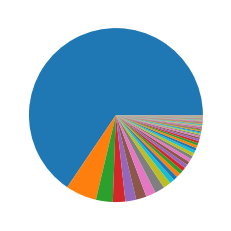

In [99]:
#proportion of total startups by COUNTRY
prop_country = df_funded_no_outliers['country_code'].value_counts(normalize=True)
plt.pie(prop_country);

In [177]:
#proportion of total startups by industry
startups_props = df_funded_no_outliers[' market '].value_counts(normalize=True)
print(startups_props)

 Software                0.109855
 Biotechnology           0.069108
 Mobile                  0.048226
 E-Commerce              0.038712
 Curated Web             0.037935
                           ...   
 Film Production         0.000060
 Neuroscience            0.000060
 Virtual Goods           0.000060
 RFID                    0.000060
 Clean Technology IT     0.000060
Name:  market , Length: 638, dtype: float64


Con outliers
Sin outliers


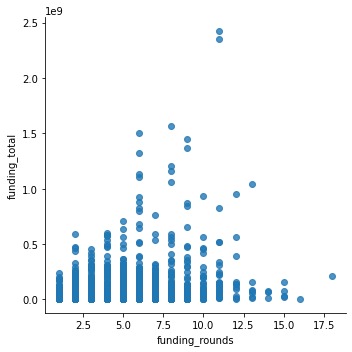

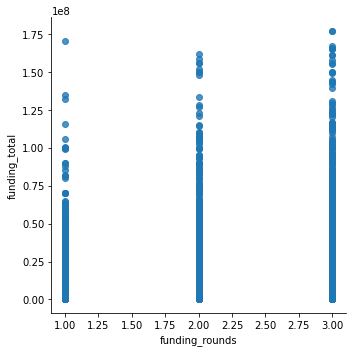

In [178]:

print('Con outliers')
regresion = sns.lmplot(y='funding_total', x='funding_rounds', data=df_funded, fit_reg=False);

print('Sin outliers')
regresion = sns.lmplot(y='funding_total', x='funding_rounds', data=df_funded_no_outliers, fit_reg=False);


Con outliers


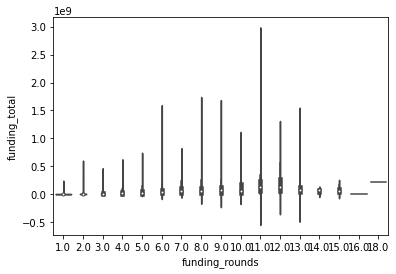

Sin outliers


<AxesSubplot:xlabel='funding_rounds', ylabel='funding_total'>

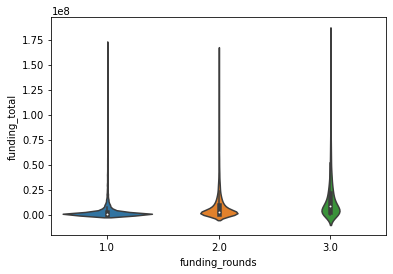

In [179]:

print('Con outliers')
sns.violinplot(y='funding_total', x='funding_rounds', data=df_funded)
plt.show()

print('Sin outliers')
sns.violinplot(y='funding_total', x='funding_rounds', data=df_funded_no_outliers)

Con outliers


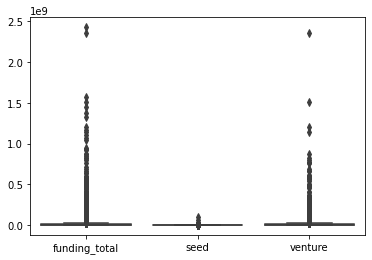

Sin outliers


<AxesSubplot:>

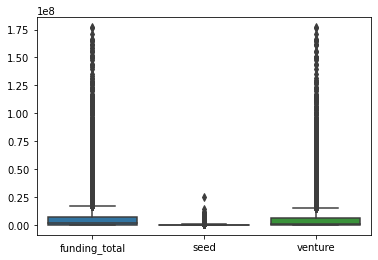

In [180]:
print('Con outliers')
sns.boxplot(data=df_funded[['funding_total', 'seed', 'venture']])
plt.show()

print('Sin outliers')
sns.boxplot(data=df_funded_no_outliers[['funding_total', 'seed', 'venture']])

Con outliers


<BarContainer object of 23175 artists>

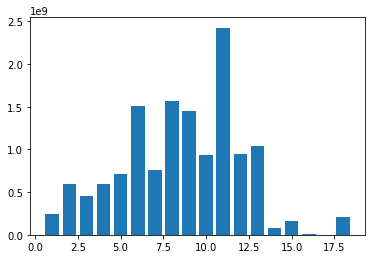

In [181]:

print('Con outliers')
y = df_funded['funding_total']
x = df_funded['funding_rounds']
plt.bar(x, y)


SIN outliers


<BarContainer object of 16713 artists>

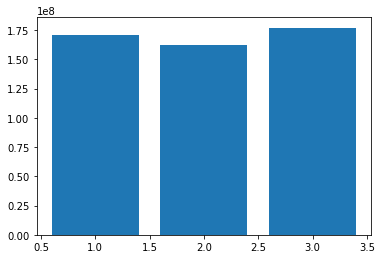

In [182]:
print('SIN outliers')
ys = df_funded_no_outliers['funding_total']
xs = df_funded_no_outliers['funding_rounds']
plt.bar(xs, ys)

In [184]:
df_funded_no_outliers['founded_at'].dtype

dtype('<M8[ns]')

In [185]:
#Transformamos el formato de la columna con la fecha de fundación de 'object' a 'datetime'
df_funded_no_outliers['founded_at'] = pd.to_datetime(df_funded_no_outliers['founded_at'])


In [186]:
#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
#df_funded_no_outliers['first_funding_at'] = pd.to_datetime(df_funded_no_outliers['first_funding_at'])
df_funded_no_outliers['first_funding_at'].min()
display(df_funded_no_outliers)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_first_to_last_funding,from_founding_to_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0 days,29 days
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0 days,0 days
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,414 days
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,646 days,0 days
17,/organization/1000-corks,1000 Corks,http://1000corks.com,|Search|,Search,"40,000",operating,USA,OR,"Portland, Oregon",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,1330 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0,304 days,581 days
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0,0 days,286 days
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0 days,982 days
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0 days,2220 days


In [187]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['first_funding_at'] >= '2000-01-01']
print('\nEste es el df sin startups financiadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups financiadas antes del 2000-01-01



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_first_to_last_funding,from_founding_to_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0 days,29 days
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0 days,0 days
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,414 days
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,646 days,0 days
17,/organization/1000-corks,1000 Corks,http://1000corks.com,|Search|,Search,"40,000",operating,USA,OR,"Portland, Oregon",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,1330 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0,304 days,581 days
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0,0 days,286 days
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0 days,982 days
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0 days,2220 days


In [101]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE LA ULTIMA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['last_funding_at'] >= '2000-01-01']
print('\nEste es el df sin startups financiadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups financiadas antes del 2000-01-01



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,0.0,1699920.0,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0


In [102]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['founded_at'] >= '2000-01-01']
print('\nEste es el df sin startups fundadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups fundadas antes del 2000-01-01



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,0.0,1699920.0,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0


In [103]:
print(df_funded_no_outliers['first_funding_at'].min())
df_funded_no_outliers['first_funding_at'].max()

0007-05-13


'2014-12-24'

In [115]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['first_funding_at'] >= '2000-01-01']

#Volvemos a comprobar el min y max
print(df_funded_no_outliers['first_funding_at'].min())
df_funded_no_outliers['first_funding_at'].max()

2000-01-01


'2014-12-24'

In [116]:
print(df_funded_no_outliers['last_funding_at'].min())
print(df_funded_no_outliers['last_funding_at'].max())

2000-01-01 00:00:00
2014-12-24 00:00:00


In [117]:
print(df_funded_no_outliers['founded_at'].min())
print(df_funded_no_outliers['founded_at'].max())

2000-01-01
2014-11-19


In [118]:
#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['first_funding_at'] = pd.to_datetime(df_funded_no_outliers['first_funding_at'])

In [119]:
#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['last_funding_at'] = pd.to_datetime(df_funded_no_outliers['last_funding_at'])

In [121]:
#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['founded_at'] = pd.to_datetime(df_funded_no_outliers['founded_at'])

In [122]:
#Comprobamos si las 3 columnas se han transformado al formato datetime64
df_funded_no_outliers.dtypes

permalink                       object
name                            object
homepage_url                    object
category_list                   object
 market                         object
 funding_total_usd              object
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
founded_at              datetime64[ns]
founded_month                   object
founded_quarter                 object
founded_year                   float64
first_funding_at        datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                          float64
grant                    

In [123]:
df_funded_no_outliers['from_first_to_last_funding'] = df_funded_no_outliers['last_funding_at'] - df_funded_no_outliers['first_funding_at']
print(df_funded_no_outliers['from_first_to_last_funding'].sort_values())

0          0 days
27989      0 days
27991      0 days
27994      0 days
27997      0 days
           ...   
4054    3911 days
9513    3949 days
11986   4031 days
25473   4992 days
10693   5063 days
Name: from_first_to_last_funding, Length: 17883, dtype: timedelta64[ns]


In [124]:
print(df_funded_no_outliers['from_first_to_last_funding'].mean())
print(df_funded_no_outliers['from_first_to_last_funding'].median())
print(df_funded_no_outliers['from_first_to_last_funding'].max())

308 days 16:15:13.135379968
0 days 00:00:00
5063 days 00:00:00


In [125]:
5416 / 365

14.838356164383562

In [126]:
df_funded_no_outliers['from_founding_to_funding'] = df_funded_no_outliers['first_funding_at'] - df_funded_no_outliers['founded_at']
print(df_funded_no_outliers['from_founding_to_funding'].sort_values())

20031   -3770 days
11986   -3757 days
1202    -3302 days
44017   -2922 days
14102   -2709 days
           ...    
15614    5344 days
42080    5364 days
48928    5387 days
47809    5416 days
27592    5416 days
Name: from_founding_to_funding, Length: 17883, dtype: timedelta64[ns]


In [127]:
print(df_funded_no_outliers['founded_at'].loc[20031])
print(df_funded_no_outliers['first_funding_at'].loc[20031])
print(df_funded_no_outliers['last_funding_at'].loc[20031])

2012-04-28 00:00:00
2002-01-01 00:00:00
2006-01-01 00:00:00


In [128]:
print(df_funded_no_outliers['founded_at'].loc[11986])
print(df_funded_no_outliers['first_funding_at'].loc[11986])
print(df_funded_no_outliers['last_funding_at'].loc[11986])

2012-06-06 00:00:00
2002-02-22 00:00:00
2013-03-07 00:00:00


In [129]:
print(df_funded_no_outliers['founded_at'].loc[1202])
print(df_funded_no_outliers['first_funding_at'].loc[1202])
print(df_funded_no_outliers['last_funding_at'].loc[1202])

2013-04-16 00:00:00
2004-04-01 00:00:00
2004-04-01 00:00:00


In [130]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE foundation
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['founded_at'] <= df_funded_no_outliers['first_funding_at']]
print('\nEste es el df sin startups fundadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups fundadas antes del 2000-01-01



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_first_to_last_funding,from_founding_to_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0 days,29 days
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0 days,0 days
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,414 days
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,646 days,0 days
17,/organization/1000-corks,1000 Corks,http://1000corks.com,|Search|,Search,"40,000",operating,USA,OR,"Portland, Oregon",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,1330 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,"38,05,520",operating,ESP,NaN,Barcelona,...,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0,3805520.0,304 days,581 days
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0,0 days,286 days
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0 days,982 days
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0 days,2220 days


In [131]:
print(df_funded_no_outliers['from_founding_to_funding'].sort_values())

11285      0 days
3005       0 days
16101      0 days
25114      0 days
39823      0 days
           ...   
15614   5344 days
42080   5364 days
48928   5387 days
27592   5416 days
47809   5416 days
Name: from_founding_to_funding, Length: 16713, dtype: timedelta64[ns]


In [132]:
#Average days from founded to first funded by COUNTRY
group_country_founded_to_funding = (df_funded_no_outliers.groupby('country_code')['from_founding_to_funding'].mean()) 

print(group_country_founded_to_funding.sort_values())

country_code
MDA      0 days 00:00:00
MLT      0 days 00:00:00
SOM      0 days 00:00:00
MKD      2 days 00:00:00
GHA     27 days 18:00:00
             ...        
DZA   1432 days 00:00:00
MAF   1477 days 00:00:00
CYP   1497 days 00:00:00
ARM   1499 days 00:00:00
PAN   2393 days 12:00:00
Name: from_founding_to_funding, Length: 94, dtype: timedelta64[ns]


In [133]:
#Average days from founded to first funded by INDUSTRY
group_industry_founded_to_funding = (df_funded_no_outliers.groupby(' market ')['from_founding_to_funding'].mean()) 

print(group_industry_founded_to_funding.sort_values())

 market 
 Funeral Industry             0 days
 Smart Building               0 days
 Architecture                 0 days
 Procurement                  0 days
 Trusted Networks             0 days
                              ...   
 Early-Stage Technology    2726 days
 Insurance Companies       3446 days
 Distributors              3835 days
 Industrial Automation     3889 days
 Defense                   4776 days
Name: from_founding_to_funding, Length: 638, dtype: timedelta64[ns]


In [134]:
#Average days from founded to first funded by COUNTRY
group_country_first_to_last_funding = (df_funded_no_outliers.groupby('country_code')['from_first_to_last_funding'].mean()) 

print(group_country_first_to_last_funding.sort_values())

country_code
HRV     0 days 00:00:00
NGA     0 days 00:00:00
MMR     0 days 00:00:00
ISL     0 days 00:00:00
SOM     0 days 00:00:00
             ...       
CYM   483 days 06:00:00
VNM   488 days 14:24:00
MDA   550 days 00:00:00
PAK   608 days 19:12:00
MAF   981 days 00:00:00
Name: from_first_to_last_funding, Length: 94, dtype: timedelta64[ns]


In [135]:
#Average days from founded to first funded by COUNTRY
group_industry_first_to_last_funding = (df_funded_no_outliers.groupby(' market ')['from_first_to_last_funding'].mean()) 

print(group_industry_first_to_last_funding.sort_values())

 market 
 Spas                                        0 days 00:00:00
 Specialty Foods                             0 days 00:00:00
 Film Production                             0 days 00:00:00
 Outdoors                                    0 days 00:00:00
 Content Delivery                            0 days 00:00:00
                                                 ...        
 Semiconductor Manufacturing Equipment    1660 days 00:00:00
 Green                                    1667 days 12:00:00
 Photo Editing                            1743 days 00:00:00
 Lighting                                 1826 days 00:00:00
 Enterprise 2.0                           1915 days 00:00:00
Name: from_first_to_last_funding, Length: 638, dtype: timedelta64[ns]


In [136]:
df_funded_no_outliers['from_first_to_last_funding'].dtype

dtype('<m8[ns]')

In [138]:
#Cuantas startups hay por industria
group_industry_count = df_funded_no_outliers.groupby(' market ')['name'].count() 

group_industry_count.sort_values(ascending=False, inplace=True)
group_industry_count[:20]

 market 
 Software                1836
 Biotechnology           1155
 Mobile                   806
 E-Commerce               647
 Curated Web              634
 Enterprise Software      517
 Hardware + Software      443
 Games                    437
 Advertising              429
 Health Care              416
 Social Media             350
 Clean Technology         330
 Health and Wellness      328
 Education                299
 Finance                  291
 Analytics                267
 Security                 205
 Manufacturing            174
 Semiconductors           152
 Web Hosting              139
Name: name, dtype: int64

In [139]:
q_industry_count = group_industry_count.quantile(0.95)

In [140]:
top_industry = group_industry_count >= q_industry_count
group_industry_count[top_industry]

 market 
 Software                1836
 Biotechnology           1155
 Mobile                   806
 E-Commerce               647
 Curated Web              634
 Enterprise Software      517
 Hardware + Software      443
 Games                    437
 Advertising              429
 Health Care              416
 Social Media             350
 Clean Technology         330
 Health and Wellness      328
 Education                299
 Finance                  291
 Analytics                267
 Security                 205
 Manufacturing            174
 Semiconductors           152
 Web Hosting              139
 Travel                   137
 Fashion                  130
 Hospitality              123
 Messaging                120
 SaaS                     118
 News                     115
 Real Estate              104
 Music                     99
 Search                    95
 Internet                  94
 Marketplaces              94
 Consulting                93
Name: name, dtype: int64

<AxesSubplot:>

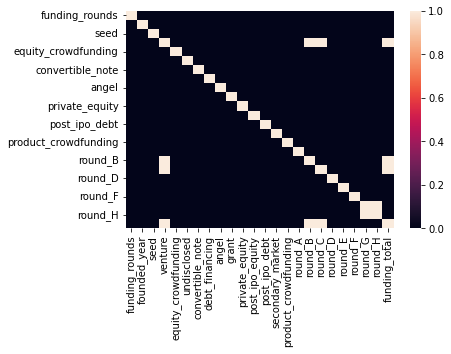

In [153]:
umb= 0.5
sns.heatmap((df_funded_no_outliers.corr() < -umb).astype(int) + (df_funded_no_outliers.corr() > umb).astype(int))

<AxesSubplot:>

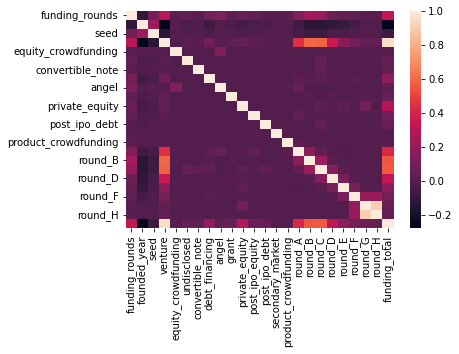

In [58]:
sns.heatmap(df_funded_no_outliers.corr())

# 1. ORIGEN 
## Numero de startups por país



In [334]:
#Number of startups by COUNTRY

#sintaxis para agrupar con aggregate varias columnas: df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
group_country_count = df_funded_no_outliers.groupby('country_code').agg({'name': 'count', 'funding_total': 'sum'})

group_country_count.rename(columns={'name':'startups'}, inplace=True)
group_country_count.sort_values(by='startups', ascending=False, inplace=True)
group_country_count[:20]
group_country_count.reset_index(inplace=True)
group_country_count

,country_code,startups,funding_total
0,USA,10963,8.428879e+10
1,GBR,957,5.926667e+09
2,CAN,518,2.842588e+09
3,FRA,387,2.533458e+09
4,ISR,328,2.647206e+09
...,...,...,...
89,MUS,1,2.000000e+05
90,JAM,1,3.200000e+04
91,DZA,1,3.788120e+05
92,SOM,1,2.000000e+06


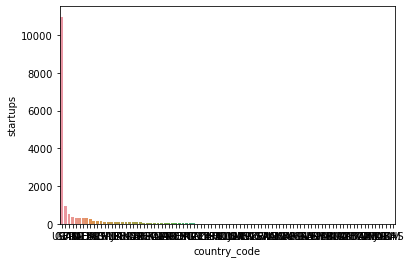

In [335]:
#mostramos en una grafica de barras el numero total de startups por país
sns.barplot(
    x=group_country_count['country_code'], 
    y=group_country_count['startups']);


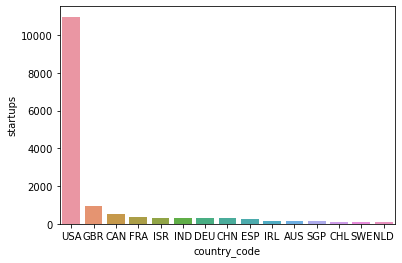

In [336]:
#acortamos a los 15 países con mayor numero de startups
sns.barplot(
    x='country_code', 
    y='startups',
    data = group_country_count[:15]);

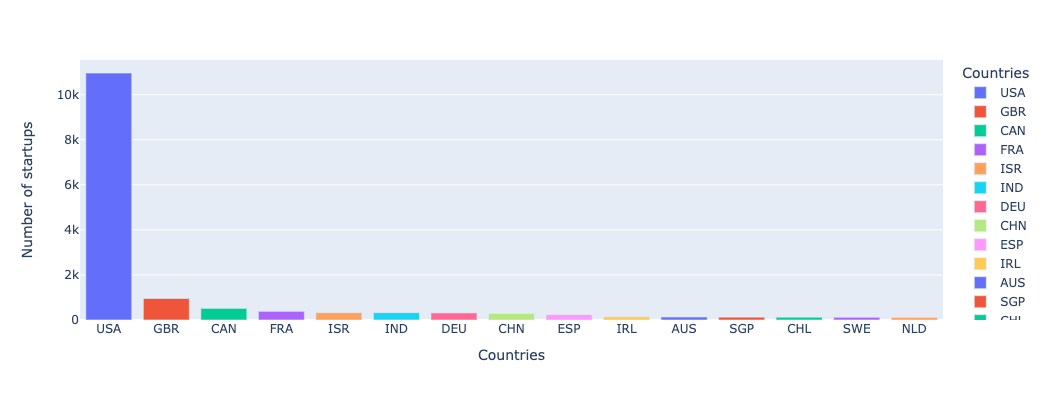

In [474]:
fig1 = px.bar(group_country_count[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of startups'}, height=400)
fig1.show()

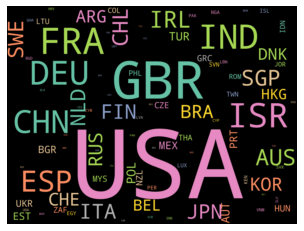

In [331]:
from wordcloud import WordCloud
import re

# Create a list of word
lista = []
text= df_funded_no_outliers['country_code']
for i in text:
    lista.append(i)
#print(str(lista))   

# Create the wordcloud object
wordcloud = WordCloud(width=2000, height=1500, margin=0, random_state=1,
                      background_color='black', colormap='Set2', 
                      collocations=False).generate(" ".join(lista))

# Save image
wordcloud.to_file("wordcloud_countries.png")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [391]:
#PROPORTION of total startups by COUNTRY
prop_country = df_funded_no_outliers['country_code'].value_counts(normalize=True)
print(prop_country[:20])

USA    0.655956
GBR    0.057261
CAN    0.030994
FRA    0.023156
ISR    0.019625
IND    0.019446
DEU    0.018848
CHN    0.017292
ESP    0.014599
IRL    0.008736
AUS    0.008078
SGP    0.007659
CHL    0.007479
SWE    0.007360
NLD    0.006941
ITA    0.006642
FIN    0.006402
JPN    0.006402
RUS    0.005924
KOR    0.005265
Name: country_code, dtype: float64


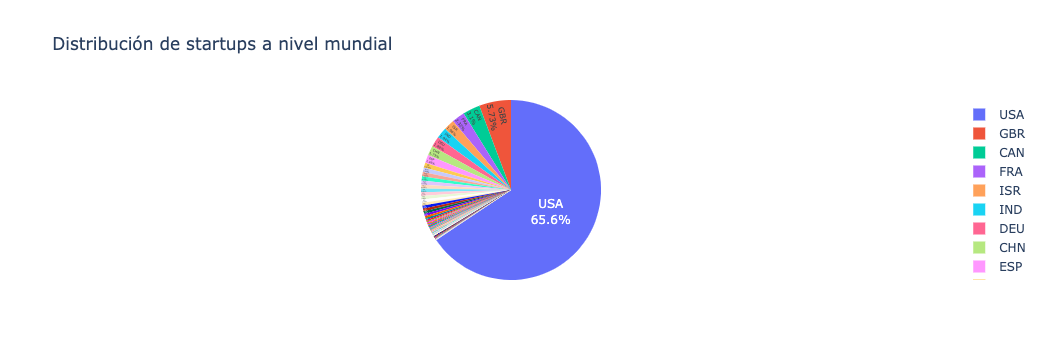

In [422]:
#Pie chart con Plotly
import plotly.express as px

fig = px.pie(group_country_count, values='startups', names='country_code', title='Distribución de startups a nivel mundial')
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

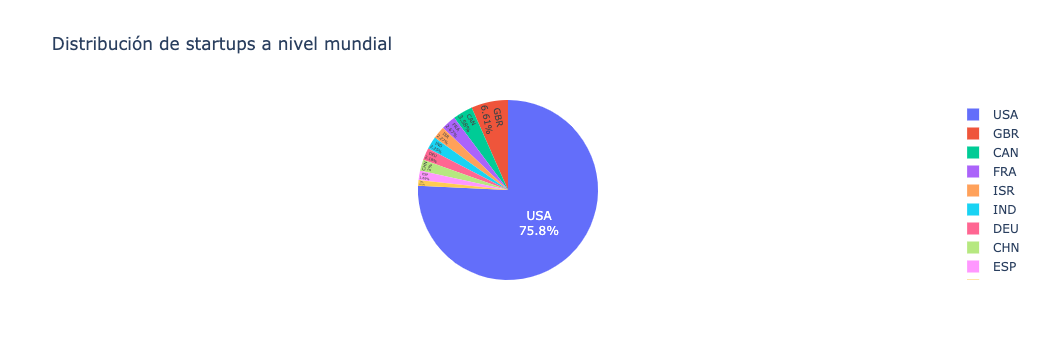

In [417]:
#Distribución entre los 10 países con mayor número de startups

fig = px.pie(group_country_pie, values='startups', names='country_code', title='Distribución de startups a nivel mundial')
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Comprobamos el funding medio por startup por país

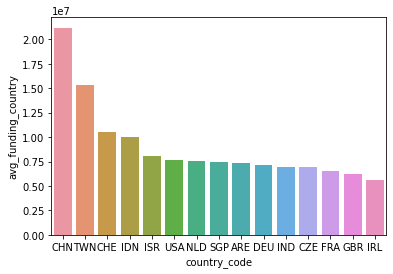

In [485]:

#Anadimos una columna con la media del funding por startup por país
group_country_count['avg_funding_country'] = round(group_country_count['funding_total'] / group_country_count['startups'],0)

group_country_count.sort_values(by='avg_funding_country', ascending=False)
#group_country_count.reset_index(inplace=True)
#del group_country_count['level_0']
#group_country_count.rename(columns={'index': 'pos_num_startups'}, inplace=True)

#solo seleccionamos países con más de 10 startups para elimanr outliers
#bool_num_startups = group_country_count['startups'] >= 10


bool_num_startups = group_country_count[group_country_count['startups'] >= 10]

avg_funding_per_country = bool_num_startups.sort_values(by='avg_funding_country', ascending=False)

#acortamos a los 15 países con mayor funding por startup
sns.barplot(
    x='country_code', 
    y='avg_funding_country',
    data = avg_funding_per_country[:15]);


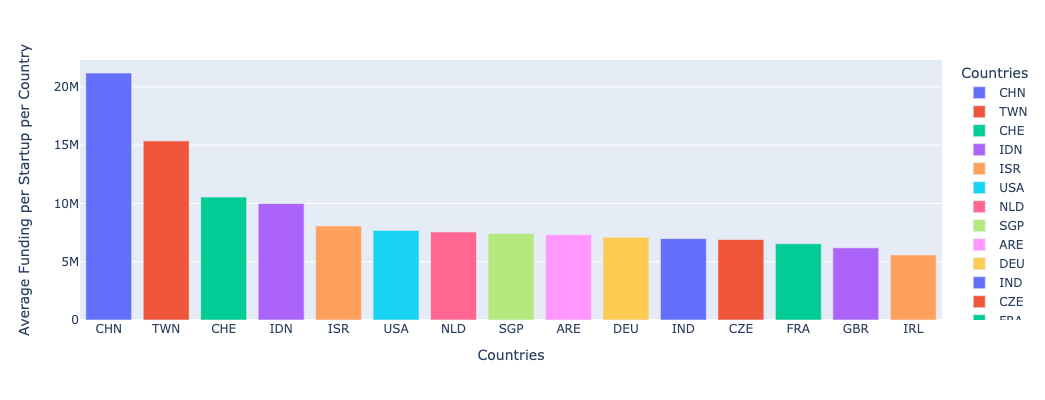

In [486]:
fig2 = px.bar(avg_funding_per_country[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig2.show()

## Comprobamos la posición de España en cuanto a número de startups vs funding medio

In [382]:
españa = group_country_count['country_code'] == 'ESP'
group_country_count[españa]
print('España se encuentra en la ', group_country_count[españa]['pos_num_startups'])

España se encuentra en la  35    8
Name: pos_num_startups, dtype: int64


## Nos centramos en los países de la UE

In [383]:
#sacamos la misma comparativa pero con países de la UE
eu_countries = ['ESP', 'DEU', 'SWE', 'ITA', 'FIN', 'NLD', 'IRL', 'FRA', 'PRT', 'DNK', 'LUX', 'BEL', 'POL', 'AUT', 'BGR', 'EST', 'SVK', 'SVN', 'HUN', 'CYP', 'GRC', 'CZE', 'LTU', 'LVA']

bool_eu_countries = group_country_count['country_code'].isin(eu_countries)


group_eu_countries_startups = group_country_count[bool_eu_countries].sort_values(by='startups', ascending=False)
group_eu_countries_startups

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]"
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]"
35,8,ESP,244,8.221606e+08,3369511.0,"(200, 1000]"
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]"
20,13,SWE,123,6.796420e+08,5525545.0,"(50, 200]"
11,14,NLD,116,8.764071e+08,7555233.0,"(50, 200]"
56,15,ITA,111,1.461397e+08,1316574.0,"(50, 200]"
28,17,FIN,107,4.542406e+08,4245239.0,"(50, 200]"
31,23,DNK,69,2.704755e+08,3919935.0,"(50, 200]"
30,24,BEL,63,2.498475e+08,3965834.0,"(50, 200]"


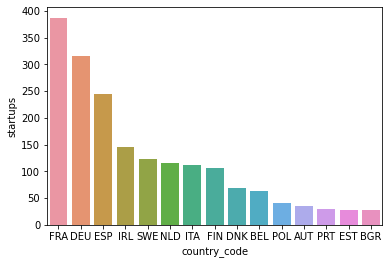

In [384]:
#acortamos a los países EU con mayor numero de startups
sns.barplot(
    x='country_code', 
    y='startups',
    data = group_eu_countries_startups[:15]);

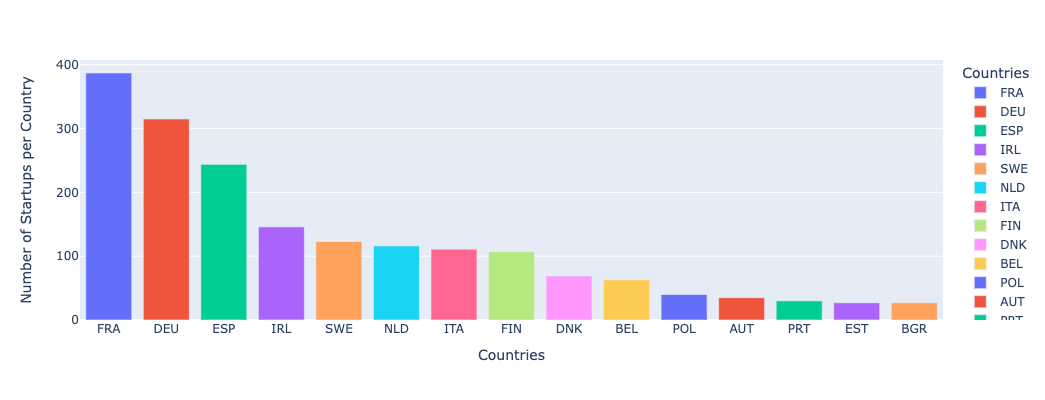

In [487]:
fig3 = px.bar(group_eu_countries_startups[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of Startups per Country'}, height=400)
fig3.show()

In [385]:
group_eu_countries_funding = group_country_count[bool_eu_countries].sort_values(by='avg_funding_country', ascending=False)
group_eu_countries_funding

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range
11,14,NLD,116,8.764071e+08,7555233.0,"(50, 200]"
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]"
16,39,CZE,18,1.242649e+08,6903606.0,"(0, 50]"
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]"
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]"
20,13,SWE,123,6.796420e+08,5525545.0,"(50, 200]"
27,28,AUT,35,1.549475e+08,4427070.0,"(0, 50]"
28,17,FIN,107,4.542406e+08,4245239.0,"(50, 200]"
29,43,LTU,15,6.164901e+07,4109934.0,"(0, 50]"
30,24,BEL,63,2.498475e+08,3965834.0,"(50, 200]"


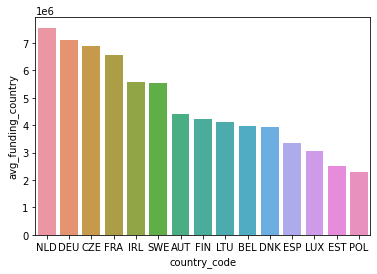

In [386]:
#acortamos a los países EU con mayor funding por startups
sns.barplot(
    x='country_code', 
    y='avg_funding_country',
    data = group_eu_countries_funding[:15]);

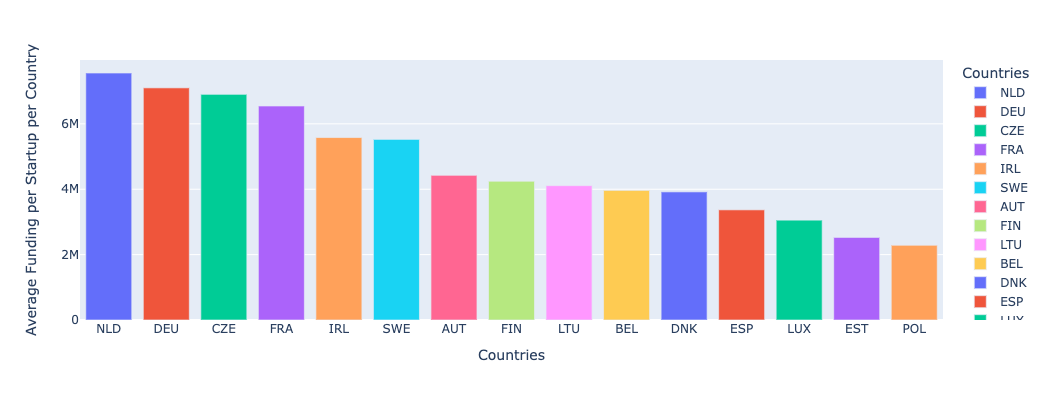

In [488]:
fig4 = px.bar(group_eu_countries_funding[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig4.show()

## Comprobamos los datos a nivel europeo total

In [387]:
#sacamos la misma comparativa pero con países de Europa
europe_all = ['RUS', 'GBR', 'CHE', 'ISR', 'TUR', 'NOR', 'ESP', 'DEU', 'SWE', 'ITA', 'FIN', 'NLD', 'IRL', 'FRA', 'PRT', 'DNK', 'CHE', 'BEL', 'POL', 'AUT', 'BGR', 'EST', 'SVK', 'SVN', 'HUN', 'CYP', 'GRC', 'CZE', 'LTU', 'LVA']

#Anadimos una columna con la media del funding por startup por país
group_country_count['avg_funding_country'] = round(group_country_count['funding_total'] / group_country_count['startups'],0)


bool_european_countries = group_country_count['country_code'].isin(europe_all)


group_european_all_startups = group_country_count[bool_european_countries].sort_values(by='startups', ascending=False)
group_european_all_startups

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]"
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]"
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]"
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]"
35,8,ESP,244,8.221606e+08,3369511.0,"(200, 1000]"
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]"
20,13,SWE,123,6.796420e+08,5525545.0,"(50, 200]"
11,14,NLD,116,8.764071e+08,7555233.0,"(50, 200]"
56,15,ITA,111,1.461397e+08,1316574.0,"(50, 200]"
28,17,FIN,107,4.542406e+08,4245239.0,"(50, 200]"


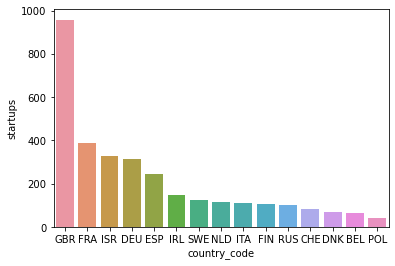

In [388]:
#acortamos a los países Europe_all con mayor numero de startups
sns.barplot(
    x='country_code', 
    y='startups',
    data = group_european_all_startups[:15]);

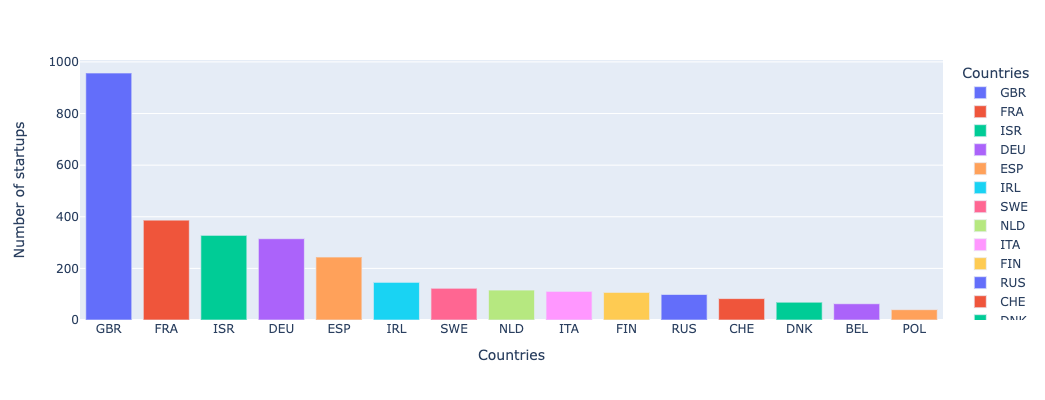

In [473]:
fig = px.bar(group_european_all_startups[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of startups'}, height=400)
fig.show()

In [389]:
group_european_all_funding = group_country_count[bool_european_countries].sort_values(by='avg_funding_country', ascending=False)
group_european_all_funding

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range
4,21,CHE,83,8.755594e+08,10548908.0,"(50, 200]"
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]"
11,14,NLD,116,8.764071e+08,7555233.0,"(50, 200]"
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]"
16,39,CZE,18,1.242649e+08,6903606.0,"(0, 50]"
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]"
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]"
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]"
20,13,SWE,123,6.796420e+08,5525545.0,"(50, 200]"
22,18,RUS,99,5.367232e+08,5421447.0,"(50, 200]"


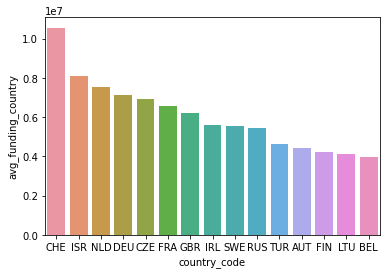

In [390]:
#acortamos a los países Europe_all con mayor numero de startups
sns.barplot(
    x='country_code', 
    y='avg_funding_country',
    data = group_european_all_funding[:15]);

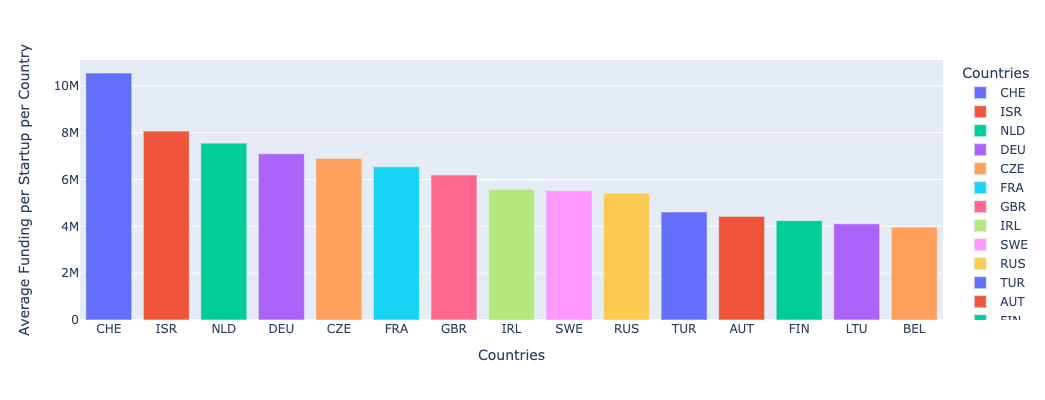

In [489]:
fig5 = px.bar(group_european_all_funding[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig5.show()

In [394]:
#Sacamos diferentes rangos según el número de startups
group_country_count['Startup-Range'] = pd.cut(x=group_country_count['startups'], bins=[0,50,200,1000,15000])
group_country_count[:20]

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range
0,79,MAF,1,2.922000e+07,29220000.0,"(0, 50]"
1,81,ARM,1,2.651750e+07,26517500.0,"(0, 50]"
2,7,CHN,289,6.123163e+09,21187414.0,"(200, 1000]"
3,48,TWN,12,1.843704e+08,15364196.0,"(0, 50]"
4,21,CHE,83,8.755594e+08,10548908.0,"(50, 200]"
5,46,IDN,14,1.398900e+08,9992143.0,"(0, 50]"
6,72,GIB,2,1.994491e+07,9972456.0,"(0, 50]"
7,64,CYM,4,3.613783e+07,9034458.0,"(0, 50]"
8,93,BHS,1,8.900000e+06,8900000.0,"(0, 50]"
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]"


In [405]:
group_country_count.sort_values(by='startups', ascending= False, inplace=True)

group_country_count['percentage'] = round((group_country_count['startups'] / group_country_count['startups'].sum()) *100,0)


group_country_count

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0
...,...,...,...,...,...,...,...
77,89,MUS,1,2.000000e+05,200000.0,"(0, 50]",0.0
91,84,TZA,1,1.700000e+04,17000.0,"(0, 50]",0.0
71,91,DZA,1,3.788120e+05,378812.0,"(0, 50]",0.0
70,78,MLT,1,4.294200e+05,429420.0,"(0, 50]",0.0


# 2. INDUSTRY
## Dónde hay mas startups por industria

In [506]:
group_industry = pd.DataFrame(df_funded_no_outliers.groupby(' market ')['name'].count())

group_industry.rename(columns={'name':'startups'}, inplace=True)

group_industry.sort_values(by='startups', ascending=False, inplace=True)
group_industry

,startups
market,
Software,1836
Biotechnology,1155
Mobile,806
E-Commerce,647
Curated Web,634
...,...
Golf Equipment,1
Sex,1
Genetic Testing,1


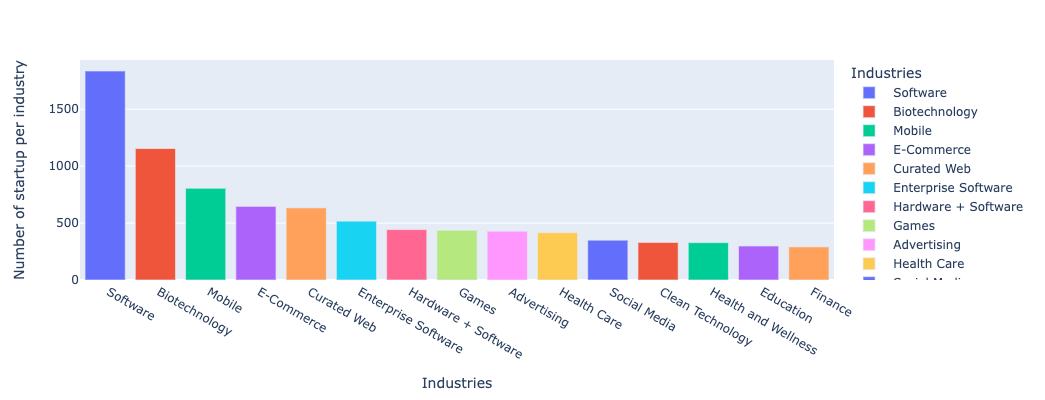

In [509]:
#Number of startups per industry

#Already reset index
#stratups_per_industry = group_industry.reset_index()

fig6 = px.bar(stratups_per_industry[:15], x=' market ', y='startups',
            color=' market ',
             labels={' market ': 'Industries', 'startups':'Number of startup per industry'}, height=400)
fig6.show()



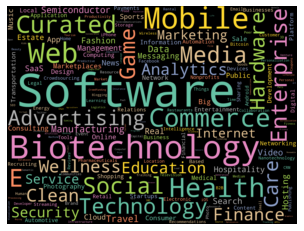

In [491]:
# Create a list of word
lista2 = []
text= df_funded_no_outliers[' market ']
for i in text:
    lista2.append(i)
#print(str(lista))   

# Create the wordcloud object
wordcloud_industries = WordCloud(width=2000, height=1500, margin=0, random_state=1,
                      background_color='black', colormap='Set2', 
                      collocations=False).generate(" ".join(lista2))

# Save image
wordcloud_industries.to_file("wordcloud_industries.png")

# Display the generated image:
plt.imshow(wordcloud_industries, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [492]:
more_than_50 = group_industry['startups'] > 50
group_industry_top = group_industry[more_than_50]
group_industry_top

,startups
market,
Software,1836
Biotechnology,1155
Mobile,806
E-Commerce,647
Curated Web,634
Enterprise Software,517
Hardware + Software,443
Games,437
Advertising,429


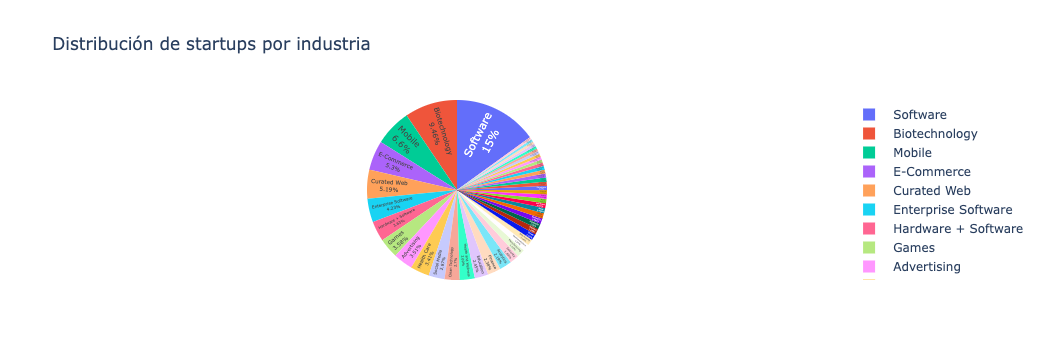

In [495]:
#Pie chart con Plotly

fig = px.pie(group_industry_top, values='startups', names=group_industry_top.index, title='Distribución de startups por industria')
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Calcular el average funding per startup per industry

In [510]:

group_industry['funding_total'] = round(df_funded_no_outliers.groupby(' market ')['funding_total'].sum(),2)

group_industry['avg_funding_industry'] = round(group_industry['funding_total'] / group_industry['startups'])


more_than_50  = group_industry[group_industry['startups'] > 50]


group_industry_top = more_than_50.sort_values(by='avg_funding_industry', ascending=False)


group_industry_top[:10]


,startups,funding_total,avg_funding_industry
market,,,
Semiconductors,152,2.601223e+09,17113311.0
Web Hosting,139,1.946923e+09,14006643.0
Clean Technology,330,4.564236e+09,13831018.0
Health Care,416,5.524738e+09,13280621.0
Entertainment,58,7.351091e+08,12674294.0
Biotechnology,1155,1.448174e+10,12538307.0
Technology,88,9.883769e+08,11231556.0
Finance,291,2.588297e+09,8894490.0
Enterprise Software,517,4.530356e+09,8762778.0


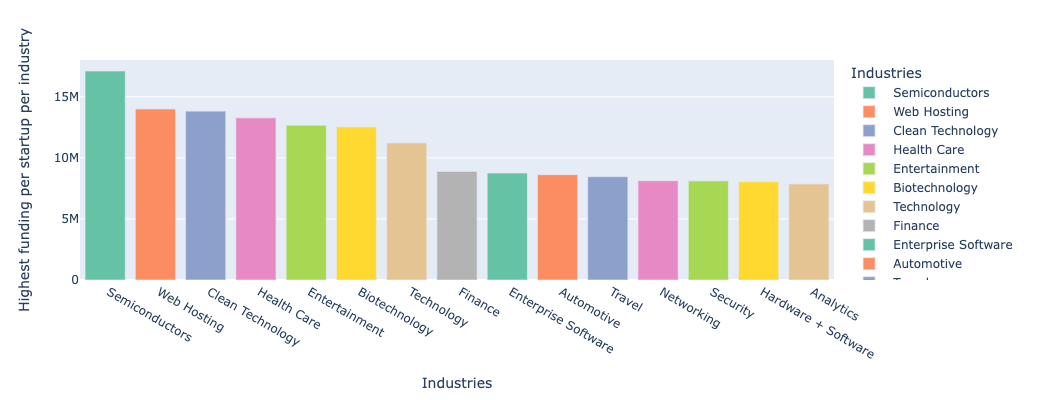

In [540]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, 
              color_discrete_sequence=px.colors.qualitative.Set2, height=400)
fig7.show()


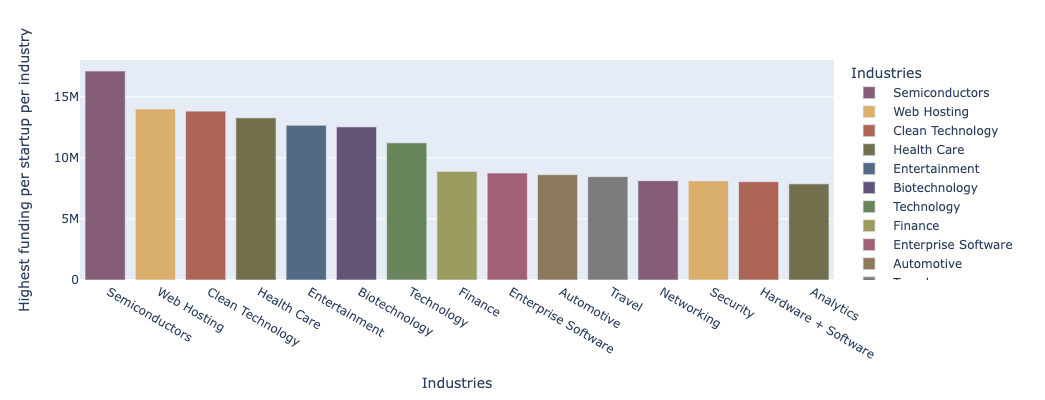

In [541]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, 
              color_discrete_sequence=px.colors.qualitative.Antique, height=400)
fig7.show()

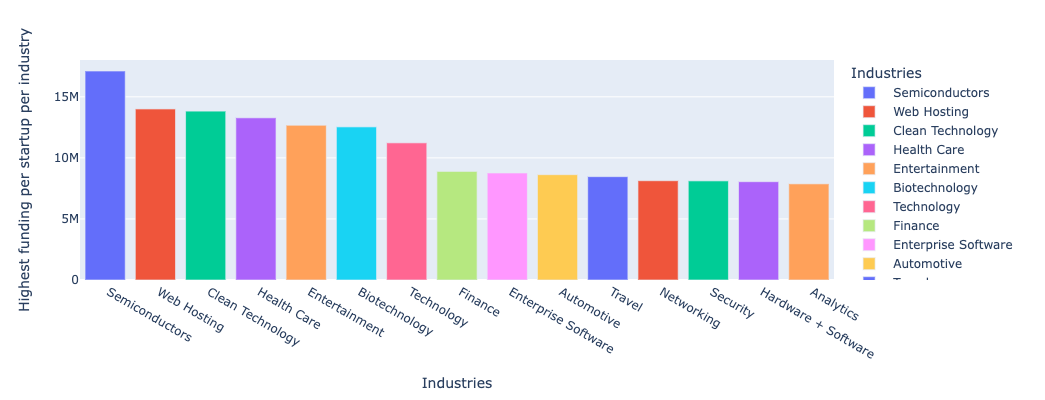

In [542]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, height=400)
fig7.show()

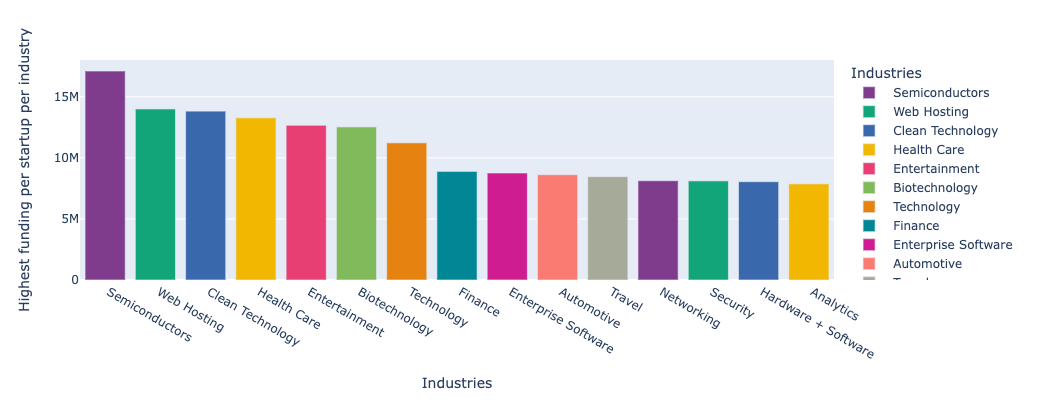

In [544]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, 
              color_discrete_sequence=px.colors.qualitative.Bold, height=400)
fig7.show()

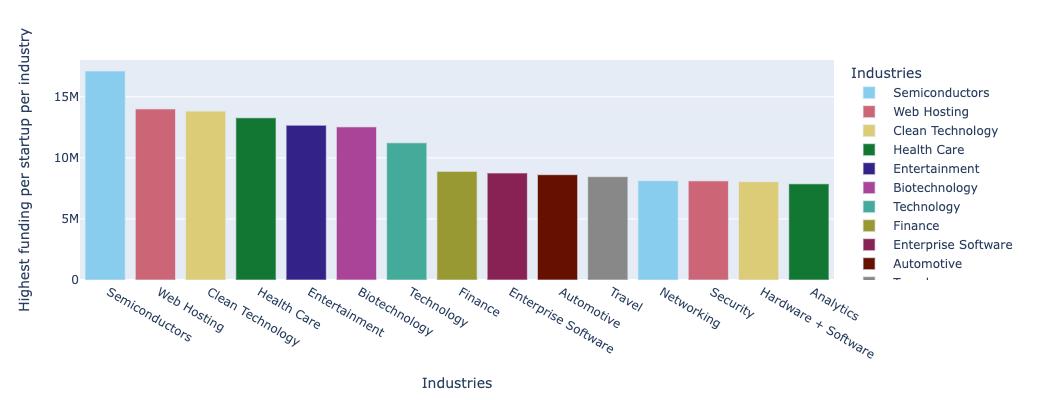

In [545]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, 
              color_discrete_sequence=px.colors.qualitative.Safe, height=400)
fig7.show()

## Calcular el average funding rounds per industry

In [515]:

group_industry_rounds = df_funded_no_outliers.groupby(' market ').agg({'name': 'count', 'funding_rounds': 'sum'})

group_industry_rounds.rename(columns={'name':'startups'}, inplace=True)

group_industry_rounds['avg_funding_rounds'] = round(group_industry_rounds['funding_rounds'] / group_industry_rounds['startups'],2)

rounds_more_than_50  = group_industry_rounds[group_industry_rounds['startups'] > 50]

rounds_group_industry_top = rounds_more_than_50.sort_values(by='avg_funding_rounds', ascending=False)
rounds_group_industry_top[:10]

,startups,funding_rounds,avg_funding_rounds
market,,,
Big Data,70,129.0,1.84
Semiconductors,152,269.0,1.77
Health Care,416,724.0,1.74
SaaS,118,205.0,1.74
Entertainment,58,99.0,1.71
Biotechnology,1155,1960.0,1.70
Enterprise Software,517,877.0,1.70
Security,205,347.0,1.69
Finance,291,493.0,1.69


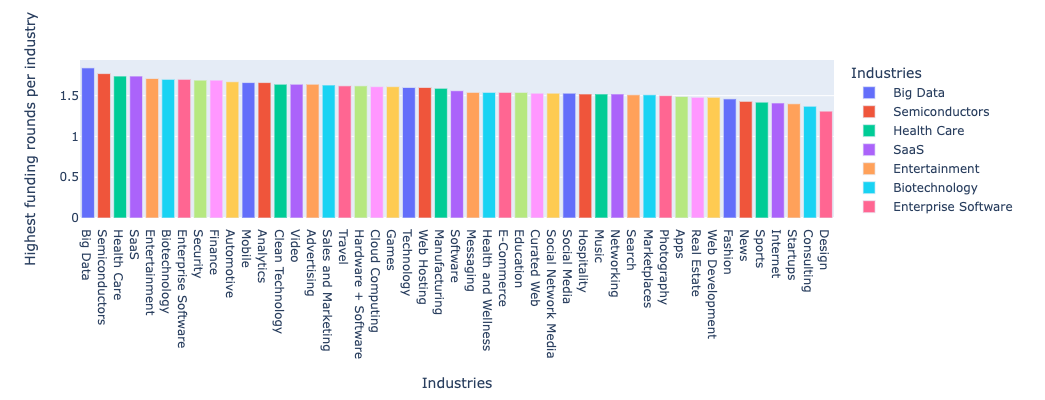

amin    1.310000
amax    1.840000
mean    1.574681
Name: avg_funding_rounds, dtype: float64


In [524]:
#funding_rounds_per_industry = rounds_group_industry_top.reset_index()
#print(funding_rounds_per_industry['avg_funding_rounds'].agg([np.min, np.max,np.mean])
#df_funded[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))

fig8 = px.bar(funding_rounds_per_industry, x=' market ', y='avg_funding_rounds',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_rounds':'Highest funding rounds per industry'}, height=400)
fig8.show()

print(funding_rounds_per_industry['avg_funding_rounds'].agg([np.min, np.max,np.mean]))

# 3. TIMING. 
### Crecimiento de la inversión en fase seed a través de los años

In [551]:
#Average seed by founded_year
group_year_avg_funding = df_funded_no_outliers.groupby('founded_year')[['seed','venture','funding_total']].mean() 

group_year_avg_funding['seed'] = round(group_year_avg_funding['seed'],0)
group_year_avg_funding['venture'] = round(group_year_avg_funding['venture'],0)
group_year_avg_funding['funding_total'] = round(group_year_avg_funding['funding_total'],0)
group_year_avg_funding['startups'] = df_clean.groupby('founded_year')['name'].count()

#group_year_avg_funding.sort_values(by='seed', ascending=False, inplace=True)
group_year_avg_funding

,seed,venture,funding_total,startups
founded_year,,,,
2000.0,63145.0,15109190.0,16093238.0,734
2001.0,107406.0,14017006.0,15499221.0,625
2002.0,58192.0,13206846.0,13963673.0,658
2003.0,53601.0,14195382.0,15308696.0,813
2004.0,91600.0,13931579.0,15445396.0,1001
2005.0,134108.0,10865186.0,12094214.0,1231
2006.0,165395.0,9991705.0,10731740.0,1583
2007.0,219677.0,8207548.0,9109237.0,2036
2008.0,249652.0,7034181.0,7797628.0,2027


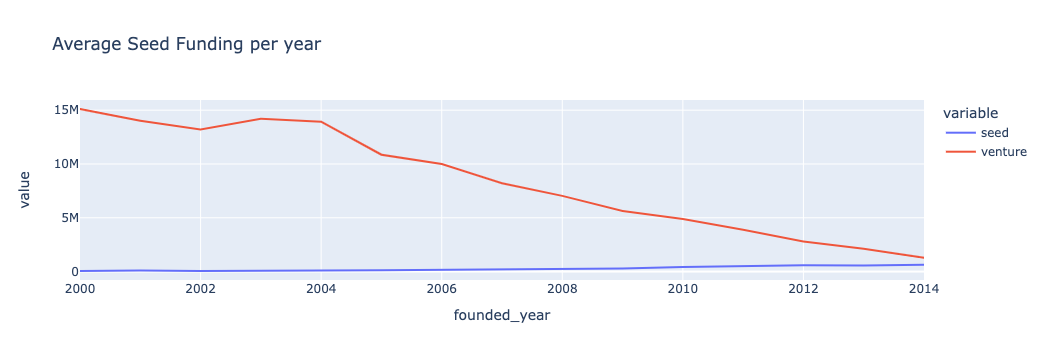

In [535]:
fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, y=["seed", 'venture'], title='Average Seed Funding per year')
fig9.show()

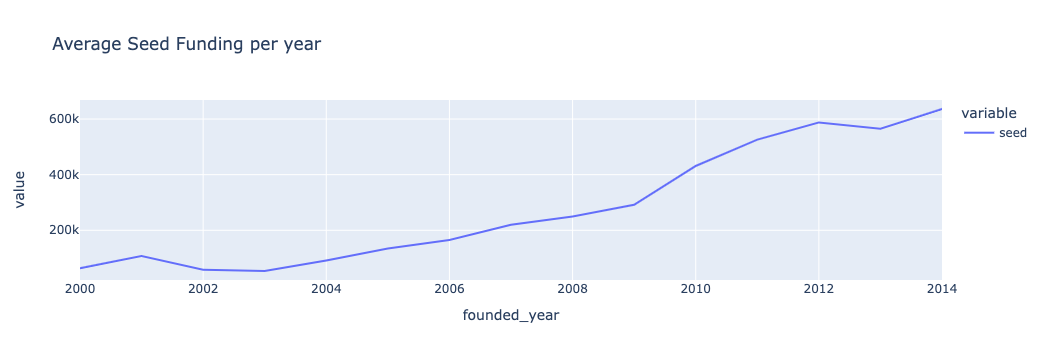

In [546]:
fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, y=["seed"], title='Average Seed Funding per year')
fig9.show()

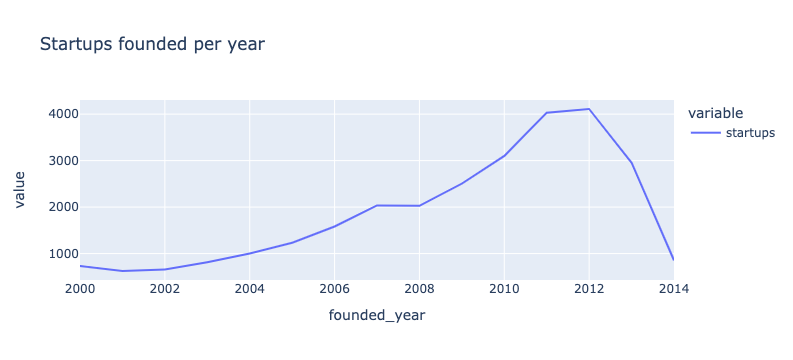

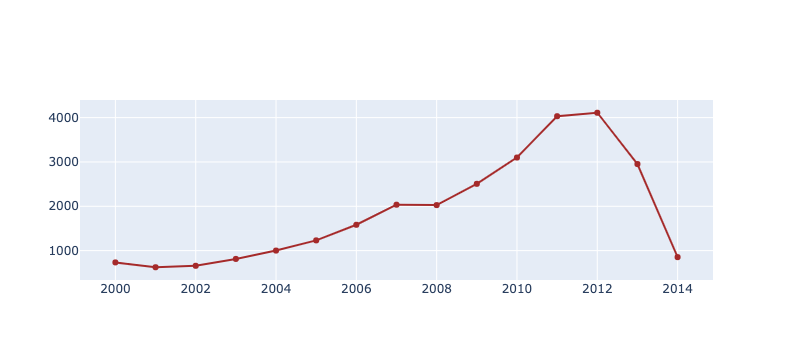

In [602]:
import plotly.graph_objs as go

fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, 
               y=['startups'],title='Startups founded per year')


fig11 = go.Figure(data=go.Scatter(x=group_year_avg_funding.index, 
                                y=group_year_avg_funding.startups, 
                                 mode='lines+markers', line_color='#A52A2A'))

fig9.show()
fig11.show()

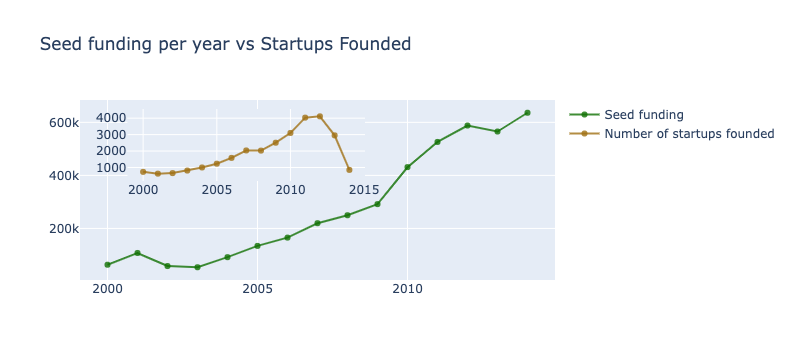

In [617]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# first line plot
trace1 = go.Scatter(
    x=group_year_avg_funding.index,
    y=group_year_avg_funding.seed,
    name = "Seed funding",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# second line plot
trace2 = go.Scatter(
    x=group_year_avg_funding.index,
    y=group_year_avg_funding.startups,
    xaxis='x2',
    yaxis='y2',
    name = "Number of startups founded",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.1, 0.6],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.55, 0.95],
        anchor='x2',
    ),
    title = 'Seed funding per year vs Startups Founded'

)

fig10 = go.Figure(data=data, layout=layout)
iplot(fig10)


## Mayor periordo entre founded y last_funded significa mas funding_total

In [537]:
df_funded_no_outliers['from_founded_to_last_funding'] = df_funded_no_outliers['from_founding_to_funding'] + df_funded_no_outliers['from_first_to_last_funding']
df_funded_no_outliers.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_first_to_last_funding,from_founding_to_funding,from_founded_to_last_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0 days,29 days,29 days
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0 days,0 days,0 days
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,414 days,414 days
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,"44,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,646 days,0 days,646 days
17,/organization/1000-corks,1000 Corks,http://1000corks.com,|Search|,Search,"40,000",operating,USA,OR,"Portland, Oregon",...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0 days,1330 days,1330 days


In [621]:
df_funded_no_outliers['from_founded_to_last_funding'].max()

Timedelta('5430 days 00:00:00')

In [619]:
#Comprobamos si las 3 columnas se han transformado al formato datetime64
df_funded_no_outliers.dtypes

permalink                                object
name                                     object
homepage_url                             object
category_list                            object
 market                                  object
 funding_total_usd                       object
status                                   object
country_code                             object
state_code                               object
region                                   object
city                                     object
funding_rounds                          float64
founded_at                       datetime64[ns]
founded_month                            object
founded_quarter                          object
founded_year                            float64
first_funding_at                 datetime64[ns]
last_funding_at                  datetime64[ns]
seed                                    float64
venture                                 float64
equity_crowdfunding                     

In [665]:
#calculamos el incremento del funding segun el numero de días desde el founding al ultimo funding

group_time = df_funded_no_outliers.groupby('from_founded_to_last_funding')[['funding_total','from_founded_to_last_funding']].mean()
group_time.sort_values(by='from_founded_to_last_funding', ascending=False, inplace=True)

#Sacamos diferentes rangos según el número de días from founded to last funding
group_time['Days-Range'] = pd.cut(x=group_time.index, 
                                  bins=pd.to_timedelta(
                                      ['0 days', '365 days','730 days','1095 days',
                                       '1460 days','1825 days','2190 days', '2555 days', 
                                       '2920 days', '3285 days','3650 days', '4015 days', 
                                       '4380 days', '4745 days', '5110 days','5475 days',
                                       ]))


group_time = group_time.groupby('Days-Range')['funding_total'].mean()
group_time = pd.DataFrame(data=group_time)
group_time.reset_index(inplace=True)

group_time

,Days-Range,funding_total
0,"(0 days 00:00:00, 365 days 00:00:00]",1.839767e+06
1,"(365 days 00:00:00, 730 days 00:00:00]",3.907643e+06
2,"(730 days 00:00:00, 1095 days 00:00:00]",5.889554e+06
3,"(1095 days 00:00:00, 1460 days 00:00:00]",8.417042e+06
4,"(1460 days 00:00:00, 1825 days 00:00:00]",1.032760e+07
5,"(1825 days 00:00:00, 2190 days 00:00:00]",1.193801e+07
6,"(2190 days 00:00:00, 2555 days 00:00:00]",1.423990e+07
7,"(2555 days 00:00:00, 2920 days 00:00:00]",1.559076e+07
8,"(2920 days 00:00:00, 3285 days 00:00:00]",1.575735e+07
9,"(3285 days 00:00:00, 3650 days 00:00:00]",1.816648e+07


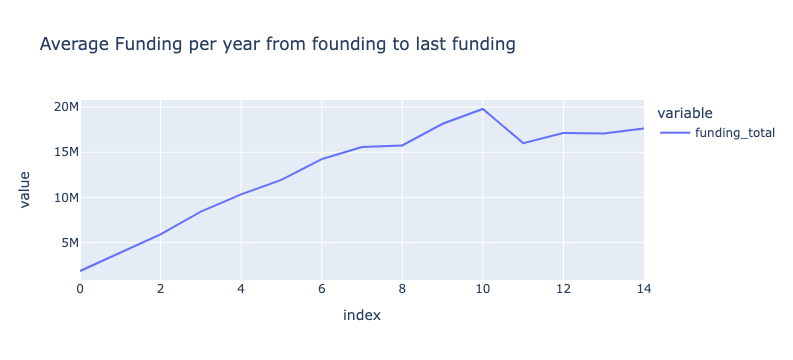

In [672]:

fig13 = px.line(group_time, x=group_time.index, y=['funding_total'], 
                title='Average Funding per year from founding to last funding')
fig13.show()


## Mathematical Expectation
### 1. Por tipo de industria

In [714]:
total_startups = group_industry['startups'].sum()
print('Numero total de startups con funding: ', total_startups)
group_industry['startups_percentage'] = round((group_industry['startups'] / total_startups) * 100,2)
group_industry['expected_in_top'] = round(((group_industry['startups_percentage'] * 1000)/ 100) ,0)
#group_industry.reset_index(inplace=True)

group_industry

Numero total de startups con funding:  16713


,market,startups,funding_total,avg_funding_industry,startups_percentage,expected_in_top
0,Biotechnology,1155,1.448174e+10,12538307.0,6.91,69.0
1,Software,1836,1.108046e+10,6035108.0,10.99,110.0
2,Health Care,416,5.524738e+09,13280621.0,2.49,25.0
3,Mobile,806,4.869042e+09,6040995.0,4.82,48.0
4,Clean Technology,330,4.564236e+09,13831018.0,1.97,20.0
...,...,...,...,...,...,...
633,Contests,1,2.000000e+04,20000.0,0.01,0.0
634,Direct Sales,1,1.800000e+04,18000.0,0.01,0.0
635,Lifestyle Products,1,1.700000e+04,17000.0,0.01,0.0
636,Textiles,1,1.700000e+04,17000.0,0.01,0.0


In [715]:
df_funded_no_outliers.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000 = df_funded_no_outliers[:1000]

top_1000 = top_1000.groupby(' market ')['name'].count()
top_1000.sort_values(ascending=False, inplace=True)
top_1000 = pd.DataFrame(data=top_1000)
top_1000.reset_index(inplace=True)
top_1000

,market,name
0,Biotechnology,157
1,Software,80
2,Health Care,63
3,Clean Technology,43
4,Enterprise Software,42
...,...,...
177,Mobile Analytics,1
178,Data Integration,1
179,Databases,1
180,Medical Professionals,1


In [719]:
join_industry_top = group_industry.join(top_1000.set_index(' market '), on=' market ')
join_industry_top.rename(columns={'name':'startups_top'}, inplace=True)
join_industry_top

,market,startups,funding_total,avg_funding_industry,startups_percentage,expected_in_top,startups_top
0,Biotechnology,1155,1.448174e+10,12538307.0,6.91,69.0,157.0
1,Software,1836,1.108046e+10,6035108.0,10.99,110.0,80.0
2,Health Care,416,5.524738e+09,13280621.0,2.49,25.0,63.0
3,Mobile,806,4.869042e+09,6040995.0,4.82,48.0,37.0
4,Clean Technology,330,4.564236e+09,13831018.0,1.97,20.0,43.0
...,...,...,...,...,...,...,...
633,Contests,1,2.000000e+04,20000.0,0.01,0.0,NaN
634,Direct Sales,1,1.800000e+04,18000.0,0.01,0.0,NaN
635,Lifestyle Products,1,1.700000e+04,17000.0,0.01,0.0,NaN
636,Textiles,1,1.700000e+04,17000.0,0.01,0.0,NaN


In [721]:
join_industry_top = join_industry_top.dropna()
join_industry_top

,market,startups,funding_total,avg_funding_industry,startups_percentage,expected_in_top,startups_top
0,Biotechnology,1155,1.448174e+10,12538307.0,6.91,69.0,157.0
1,Software,1836,1.108046e+10,6035108.0,10.99,110.0,80.0
2,Health Care,416,5.524738e+09,13280621.0,2.49,25.0,63.0
3,Mobile,806,4.869042e+09,6040995.0,4.82,48.0,37.0
4,Clean Technology,330,4.564236e+09,13831018.0,1.97,20.0,43.0
...,...,...,...,...,...,...,...
268,Online Dating,9,3.265926e+07,3628806.0,0.05,0.0,1.0
270,Enterprise Purchasing,1,3.130000e+07,31300000.0,0.01,0.0,1.0
274,Motors,1,3.020000e+07,30200000.0,0.01,0.0,1.0
275,Distributed Generation,1,3.000000e+07,30000000.0,0.01,0.0,1.0


In [722]:
join_industry_top['math_expectation'] = ((join_industry_top['startups_top'] - join_industry_top['expected_in_top']) / 1000)*100
join_industry_top

/var/folders/sy/nxmnw_wj4_v63snpccyy_vjc0000gn/T/ipykernel_2510/1205811270.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,market,startups,funding_total,avg_funding_industry,startups_percentage,expected_in_top,startups_top,math_expectation
0,Biotechnology,1155,1.448174e+10,12538307.0,6.91,69.0,157.0,8.8
1,Software,1836,1.108046e+10,6035108.0,10.99,110.0,80.0,-3.0
2,Health Care,416,5.524738e+09,13280621.0,2.49,25.0,63.0,3.8
3,Mobile,806,4.869042e+09,6040995.0,4.82,48.0,37.0,-1.1
4,Clean Technology,330,4.564236e+09,13831018.0,1.97,20.0,43.0,2.3
...,...,...,...,...,...,...,...,...
268,Online Dating,9,3.265926e+07,3628806.0,0.05,0.0,1.0,0.1
270,Enterprise Purchasing,1,3.130000e+07,31300000.0,0.01,0.0,1.0,0.1
274,Motors,1,3.020000e+07,30200000.0,0.01,0.0,1.0,0.1
275,Distributed Generation,1,3.000000e+07,30000000.0,0.01,0.0,1.0,0.1


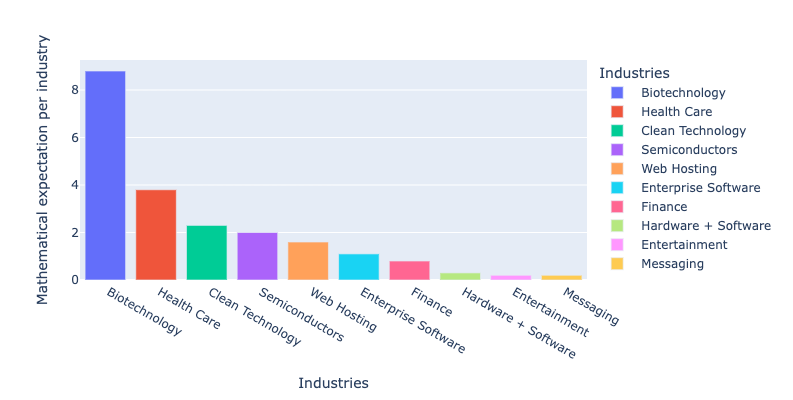

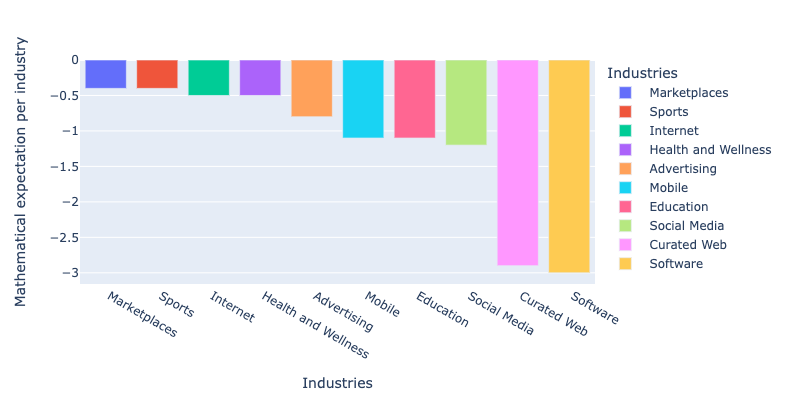

In [728]:
mathexp_more_than_50  = join_industry_top[join_industry_top['startups'] > 50]

mathexp_group_industry_top = mathexp_more_than_50.sort_values(by='math_expectation', ascending=False)
mathexp_group_industry_top

fig13 = px.bar(mathexp_group_industry_top[:10], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_industry_top[-10:], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig14.show()

### 2. Math Exp por país

In [729]:
group_country_count

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0
...,...,...,...,...,...,...,...
77,89,MUS,1,2.000000e+05,200000.0,"(0, 50]",0.0
91,84,TZA,1,1.700000e+04,17000.0,"(0, 50]",0.0
71,91,DZA,1,3.788120e+05,378812.0,"(0, 50]",0.0
70,78,MLT,1,4.294200e+05,429420.0,"(0, 50]",0.0


In [730]:
total_startups = group_country_count['startups'].sum()
print('Numero total de startups con funding: ', total_startups)

group_country_count['expected_in_top'] = round(((group_country_count['percentage'] * 1000)/ 100) ,0)

group_country_count

Numero total de startups con funding:  16713


,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage,expected_in_top
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0,660.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0,60.0
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0,30.0
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0,20.0
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0,20.0
...,...,...,...,...,...,...,...,...
77,89,MUS,1,2.000000e+05,200000.0,"(0, 50]",0.0,0.0
91,84,TZA,1,1.700000e+04,17000.0,"(0, 50]",0.0,0.0
71,91,DZA,1,3.788120e+05,378812.0,"(0, 50]",0.0,0.0
70,78,MLT,1,4.294200e+05,429420.0,"(0, 50]",0.0,0.0


In [732]:
df_funded_no_outliers.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000_country = df_funded_no_outliers[:1000]

top_1000_country = top_1000_country.groupby('country_code')['name'].count()

top_1000_country.sort_values(ascending=False, inplace=True)
top_1000_country = pd.DataFrame(data=top_1000_country )
#top_1000_country.reset_index(inplace=True)

top_1000_country 

,country_code,name
0,USA,710
1,CHN,65
2,GBR,47
3,CAN,21
4,ISR,20
5,IND,19
6,DEU,17
7,FRA,17
8,CHE,10
9,NLD,10


In [733]:
join_country_top = group_country_count.join(top_1000_country .set_index('country_code'), on='country_code')
join_country_top.rename(columns={'name':'startups_top'}, inplace=True)
join_country_top

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage,expected_in_top,startups_top
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0,660.0,710.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0,60.0,47.0
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0,30.0,21.0
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0,20.0,17.0
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...
77,89,MUS,1,2.000000e+05,200000.0,"(0, 50]",0.0,0.0,NaN
91,84,TZA,1,1.700000e+04,17000.0,"(0, 50]",0.0,0.0,NaN
71,91,DZA,1,3.788120e+05,378812.0,"(0, 50]",0.0,0.0,NaN
70,78,MLT,1,4.294200e+05,429420.0,"(0, 50]",0.0,0.0,NaN


In [735]:
join_country_top = join_country_top.dropna()
join_country_top

,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage,expected_in_top,startups_top
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0,660.0,710.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0,60.0,47.0
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0,30.0,21.0
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0,20.0,17.0
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0,20.0,20.0
15,5,IND,325,2.270296e+09,6985527.0,"(200, 1000]",2.0,20.0,19.0
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]",2.0,20.0,17.0
2,7,CHN,289,6.123163e+09,21187414.0,"(200, 1000]",2.0,20.0,65.0
35,8,ESP,244,8.221606e+08,3369511.0,"(200, 1000]",1.0,10.0,6.0
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]",1.0,10.0,6.0


In [736]:
join_country_top['math_expectation'] = ((join_country_top['startups_top'] - join_country_top['expected_in_top']) / 1000)*100
join_country_top

/var/folders/sy/nxmnw_wj4_v63snpccyy_vjc0000gn/T/ipykernel_2510/3592329824.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pos_num_startups,country_code,startups,funding_total,avg_funding_country,Startup-Range,percentage,expected_in_top,startups_top,math_expectation
10,0,USA,10963,8.428879e+10,7688478.0,"(1000, 15000]",66.0,660.0,710.0,5.0
18,1,GBR,957,5.926667e+09,6192965.0,"(200, 1000]",6.0,60.0,47.0,-1.3
21,2,CAN,518,2.842588e+09,5487621.0,"(200, 1000]",3.0,30.0,21.0,-0.9
17,3,FRA,387,2.533458e+09,6546403.0,"(200, 1000]",2.0,20.0,17.0,-0.3
9,4,ISR,328,2.647206e+09,8070749.0,"(200, 1000]",2.0,20.0,20.0,0.0
15,5,IND,325,2.270296e+09,6985527.0,"(200, 1000]",2.0,20.0,19.0,-0.1
14,6,DEU,315,2.236942e+09,7101403.0,"(200, 1000]",2.0,20.0,17.0,-0.3
2,7,CHN,289,6.123163e+09,21187414.0,"(200, 1000]",2.0,20.0,65.0,4.5
35,8,ESP,244,8.221606e+08,3369511.0,"(200, 1000]",1.0,10.0,6.0,-0.4
19,9,IRL,146,8.148781e+08,5581357.0,"(50, 200]",1.0,10.0,6.0,-0.4


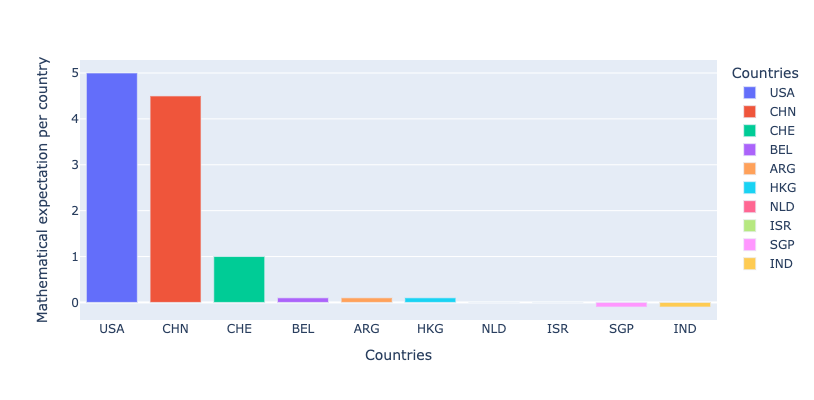

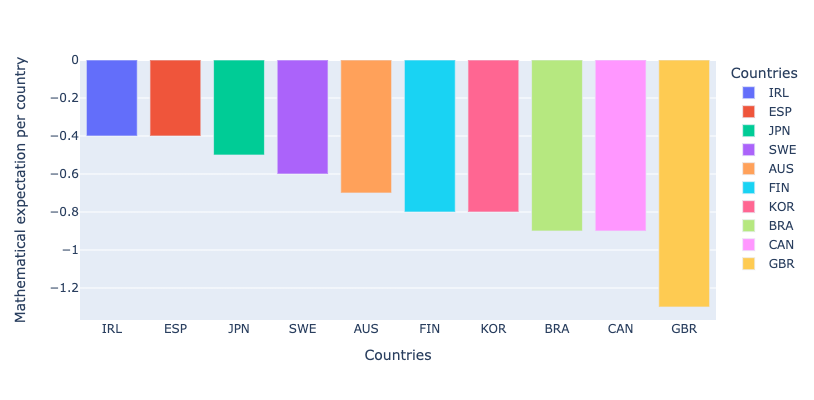

In [738]:
mathexp_more_than_50_country  = join_country_top[join_country_top['startups'] > 50]

mathexp_group_country_top = mathexp_more_than_50_country.sort_values(by='math_expectation', ascending=False)
mathexp_group_country_top 

fig15 = px.bar(mathexp_group_country_top[:10], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig15.show()

fig16 = px.bar(mathexp_group_country_top[-10:], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig16.show()